<a href="https://www.kaggle.com/code/thekazisakib/titanic-survival-prediction?scriptVersionId=155955805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Problem statement:**

The sinking of the RMS Titanic in 1912 is a tragic event in maritime history. During its maiden voyage, the "unsinkable" ship collided with an iceberg, leading to the loss of 1502 lives due to a shortage of lifeboats.

Your task is to build a predictive model that can answer the crucial question: "What sorts of people were more likely to survive the Titanic disaster?". Utilize passenger data, including features such as name, age, gender, and socio-economic class, to develop a model that predicts the likelihood of survival for each passenger.

# **Data Collection**

In [1]:
### Importing necessery Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Data Cleaning**

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
## Check Misssing Values
##these are the features with nan value
features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(train_data[feature].isnull().mean()*100,5), '% missing values')

Age 19.86532 % missing values
Cabin 77.10438 % missing values
Embarked 0.22447 % missing values


In [9]:
#Age
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
#Embarked
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [10]:
train_data['Died'] = 1 - train_data['Survived']

In [11]:
#check all categories
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
# Calculate and print the survival rates for women and men
female_survival_rate = (train_data[train_data['Sex'] == 'female']['Survived'].sum() / len(train_data[train_data['Sex'] == 'female'])) * 100
male_survival_rate = (train_data[train_data['Sex'] == 'male']['Survived'].sum() / len(train_data[train_data['Sex'] == 'male'])) * 100

print("Survival rate for women: {:.2f}%".format(female_survival_rate))
print("Survival rate for men: {:.2f}%".format(male_survival_rate))

Survival rate for women: 74.20%
Survival rate for men: 18.89%


# Data Exploration/Analysis

**Survival based on Gender**

In [13]:
import plotly.express as px

fig = px.bar(train_data, x='Sex', y=['Survived', 'Died'], color='Sex',
             labels={'value': 'Number of Passengers'},
             color_discrete_map={'male': '#EB89B5', 'female': '#330C73'},
             title='Survivors and Non-Survivors Categorized by Gender'
            )

fig.update_layout(width=600)
fig.show()


**Survival based on Fare, Pclass, and Survived**

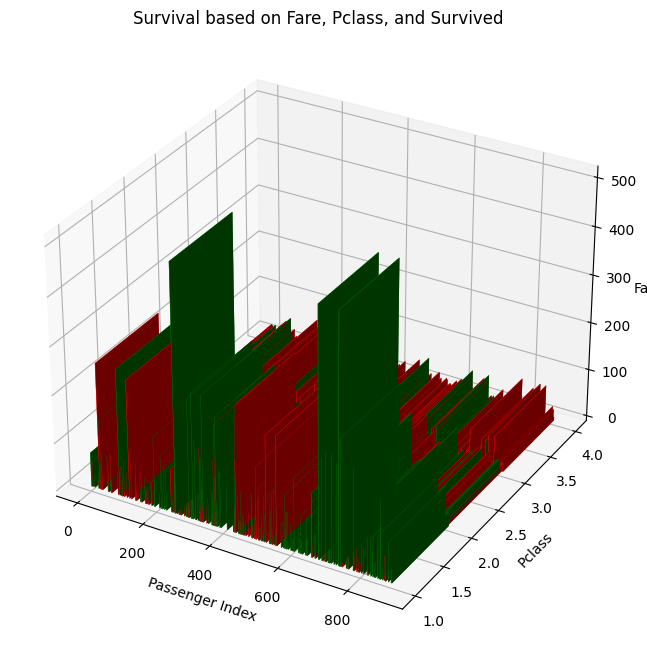

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

survived_colors = train_data['Survived'].map({0: 'red', 1: 'green'})

ax.bar3d(train_data.index, train_data['Pclass'], 0, 1, 1, train_data['Fare'],
         shade=True, color=survived_colors)

ax.set_xlabel('Passenger Index')  # Replace 'Passenger Index' with your actual x-axis label
ax.set_ylabel('Pclass')
ax.set_zlabel('Fare')
ax.set_title('Survival based on Fare, Pclass, and Survived')

plt.show()


**Survival based on Age of Passengers**

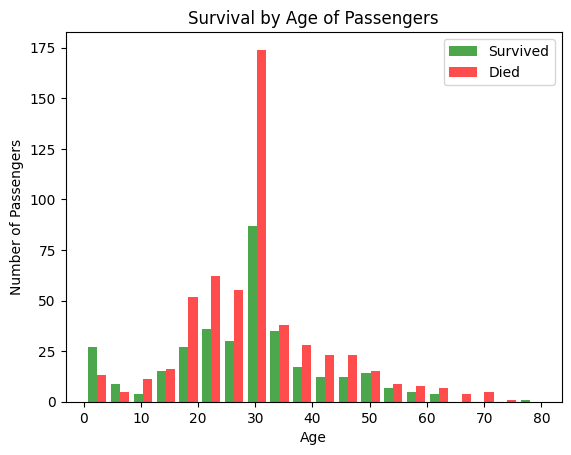

In [15]:
survived = train_data[train_data['Survived'] == 1]['Age'].dropna()
died = train_data[train_data['Survived'] == 0]['Age'].dropna()

plt.hist([survived, died], bins=20, color=['green', 'red'], alpha=0.7, label=['Survived', 'Died'])

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Survival by Age of Passengers')
plt.legend()

plt.show()


**Survival by Fare of Passengers**

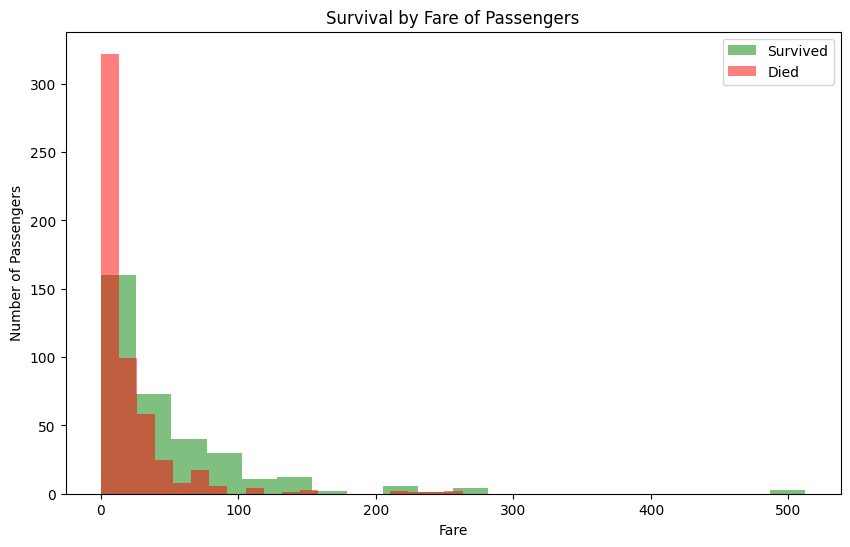

In [16]:
plt.figure(figsize=(10, 6))

plt.hist(train_data[train_data['Survived'] == 1]['Fare'], bins=20, color='green', alpha=0.5, label='Survived')
plt.hist(train_data[train_data['Survived'] == 0]['Fare'], bins=20, color='red', alpha=0.5, label='Died')

plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Survival by Fare of Passengers')
plt.legend()

plt.show()


**Average Fare for Each Pclass**

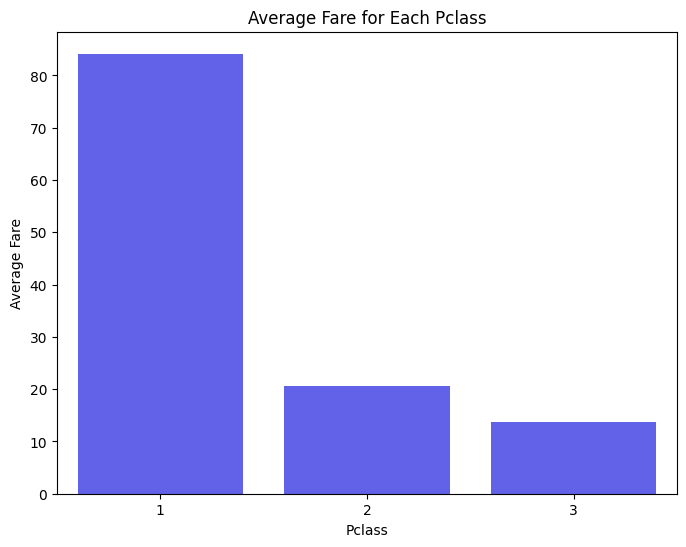

In [17]:
plt.figure(figsize=(8, 6))

sns.barplot(x='Pclass', y='Fare', data=train_data, ci=None, color='blue', alpha=0.7)

plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.title('Average Fare for Each Pclass')

plt.show()


In [18]:
# Encode categorical variables
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

In [19]:
# Numerical informations of the train dataset
train_data.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Died
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.616162
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [20]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived','Died'], axis=1)
y = train_data['Survived']

In [21]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((712, 8), (179, 8))

In [22]:
# Display the preprocessed dataset
print(X_train.head())

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
331       1    0  45.5      0      0  28.5000       False        True
733       2    0  23.0      0      0  13.0000       False        True
382       3    0  32.0      0      0   7.9250       False        True
704       3    0  26.0      1      0   7.8542       False        True
813       3    1   6.0      4      2  31.2750       False        True


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 43.6 KB


# **Model Training And Model Selection**

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

**Regression Models**

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model
    model_train_mae = np.mean(np.abs(y_train - y_train_pred))
    model_test_mae = np.mean(np.abs(y_test - y_test_pred))

    model_train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    model_test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    model_train_r2 = model.score(X_train, y_train)
    model_test_r2 = model.score(X_test, y_test)

    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('=' * 35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3801
- Mean Absolute Error: 0.2950
- R2 Score: 0.3845
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3674
- Mean Absolute Error: 0.2851
- R2 Score: 0.4433


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4699
- Mean Absolute Error: 0.4480
- R2 Score: 0.0593
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4749
- Mean Absolute Error: 0.4536
- R2 Score: 0.0698


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3801
- Mean Absolute Error: 0.2957
- R2 Score: 0.3845
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3674
- Mean Absolute Error: 0.2857
- R2 Score: 0.4434


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3771
- Mean Absolute Error: 0.2868
- R2 Score: 0.3942
-----------------------

**Classification Models**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('=' * 35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.8020
- F1 score: 0.7998
- Precision: 0.7613
- Recall: 0.6903
- Roc Auc Score: 0.7798
----------------------------------
Model performance for Test set
- Accuracy: 0.8101
- F1 score: 0.8092
- Precision: 0.7857
- Recall: 0.7432
- Roc Auc Score: 0.8002


Decision Tree
Model performance for Training set
- Accuracy: 0.9803
- F1 score: 0.9802
- Precision: 0.9961
- Recall: 0.9515
- Roc Auc Score: 0.9746
----------------------------------
Model performance for Test set
- Accuracy: 0.7933
- F1 score: 0.7926
- Precision: 0.7606
- Recall: 0.7297
- Roc Auc Score: 0.7839


Random Forest
Model performance for Training set
- Accuracy: 0.9803
- F1 score: 0.9803
- Precision: 0.9811
- Recall: 0.9664
- Roc Auc Score: 0.9776
----------------------------------
Model performance for Test set
- Accuracy: 0.8156
- F1 score: 0.8146
- Precision: 0.7971
- Recall: 0.7432
- Roc Auc Score: 0.8050


Gradient Boost
Model performance for Training set

In [27]:
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameters
rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting hyperparameters
gb_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# k-Nearest Neighbors hyperparameters
knn_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}


In [28]:
rf_grid

{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [29]:
gb_grid

{'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}

In [30]:
knn_grid

{'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

In [31]:
# Models list for Hyperparameter tuning
randomcv_models = [("K-Neighbors Regressor", KNeighborsRegressor(), knn_grid),
                   ("Random Forest", RandomForestRegressor(), rf_grid),
                   ("Adaboost Regressor",AdaBoostRegressor(),gb_grid)
                   
                   ]

In [32]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=5, p=2, weights=distance; tota

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define models with best hyperparameters
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features='auto', max_depth=None, n_jobs=-1),
    "K-Neighbors": KNeighborsRegressor(n_neighbors=10, n_jobs=-1),
    "AdaBoost": AdaBoostRegressor(n_estimators=60, loss='linear')
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make# Predictions for each model
predictions = {}
for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    predictions[model_name] = y_test_pred

    # Evaluate model performance
    train_rmse, test_rmse = mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False)
    train_mae, test_mae = mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)
    train_r2, test_r2 = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

    # Print results
    print(f"Model: {model_name}")
    print(f"Training set - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
    print(f"Test set - RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")
    print("=" * 35)
    print("\n")


Model: Random Forest
Training set - RMSE: 0.4071, MAE: 0.1657, R2: 0.2939
Test set - RMSE: 0.3800, MAE: 0.2456, R2: 0.4044


Model: K-Neighbors
Training set - RMSE: 0.4071, MAE: 0.1657, R2: 0.2939
Test set - RMSE: 0.4303, MAE: 0.3480, R2: 0.2363


Model: AdaBoost
Training set - RMSE: 0.4071, MAE: 0.1657, R2: 0.2939
Test set - RMSE: 0.3917, MAE: 0.3168, R2: 0.3672




In [34]:
# Create a DataFrame with predictions
submission_data = pd.DataFrame(predictions)

# Save the DataFrame to a CSV file
submission_data.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
